In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [34]:
def load_data(filename):
    data = pd.read_csv(filename)
    print(data.head())
    print(data.describe())
    return data

def plot_performance(data, x, y, title, xlabel, ylabel, hue=None, style=None):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=x, y=y, hue=hue, style=style, markers=True, dashes=False)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title=hue)
    plt.show()

def perform_regression(data, predictor_var, response_var, transformation=None):
    if transformation:
        X = data[predictor_var].apply(transformation)
    else:
        X = data[predictor_var]

    X = sm.add_constant(X)  # Adding a constant
    y = data[response_var]
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Optional: Plotting the data and the fitted model
    plt.scatter(data[predictor_var], y, color='blue', label='Actual Data')
    plt.plot(data[predictor_var], model.predict(X), color='red', label='Fitted Line')
    plt.xlabel(predictor_var)
    plt.ylabel(response_var)
    plt.title(f'Regression Analysis: {response_var} vs. {predictor_var}')
    plt.legend()
    plt.show()






# Bucket knn

used 1000 training points and 100 testing points. I looked at and plotted both the gaussian and normal distributions. 

## visualizing the data

      n  averageTime
0  1000       806375
1  2000      1031207
2  3000      1253754
3  4000      1364450
4  5000      1477175
                  n   averageTime
count     20.000000  2.000000e+01
mean   10500.000000  1.436265e+06
std     5916.079783  2.067016e+05
min     1000.000000  8.063750e+05
25%     5750.000000  1.376501e+06
50%    10500.000000  1.511454e+06
75%    15250.000000  1.547465e+06
max    20000.000000  1.634877e+06
      n  averageTime
0  1000       681996
1  2000       737115
2  3000       903332
3  4000      1009642
4  5000      1040470
                  n   averageTime
count     20.000000  2.000000e+01
mean   10500.000000  1.014656e+06
std     5916.079783  1.446203e+05
min     1000.000000  6.819960e+05
25%     5750.000000  9.241085e+05
50%    10500.000000  1.034604e+06
75%    15250.000000  1.132302e+06
max    20000.000000  1.195913e+06
    k  averageTime
0   2       230284
1   4       226954
2   6       229741
3   8       229813
4  10       229941
                k    a

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/1855910478.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


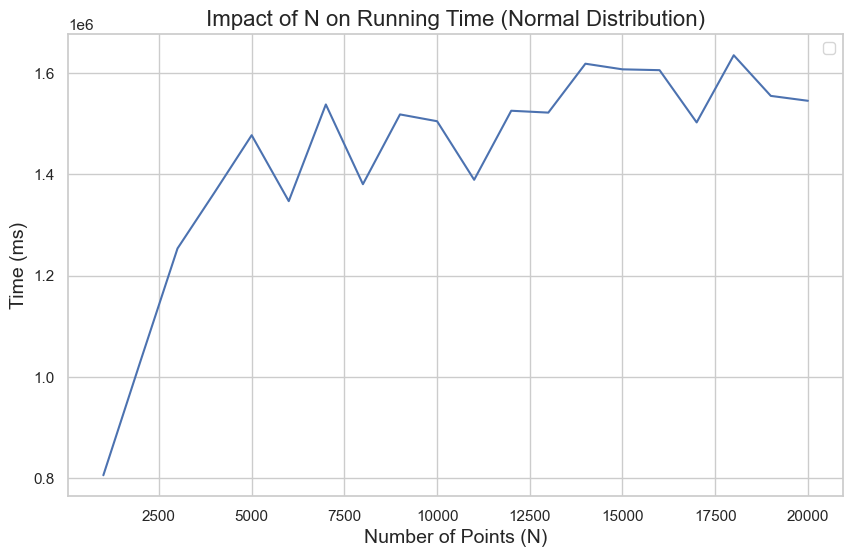

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/1855910478.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


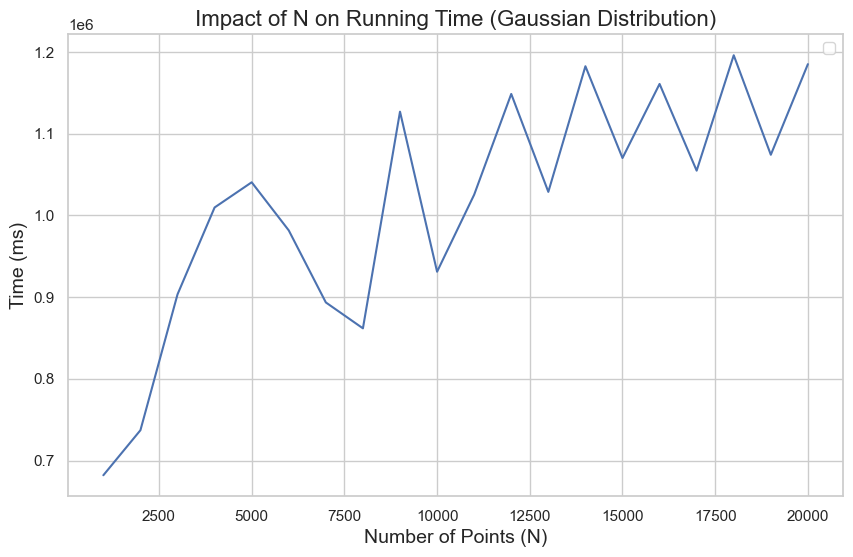

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/1855910478.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


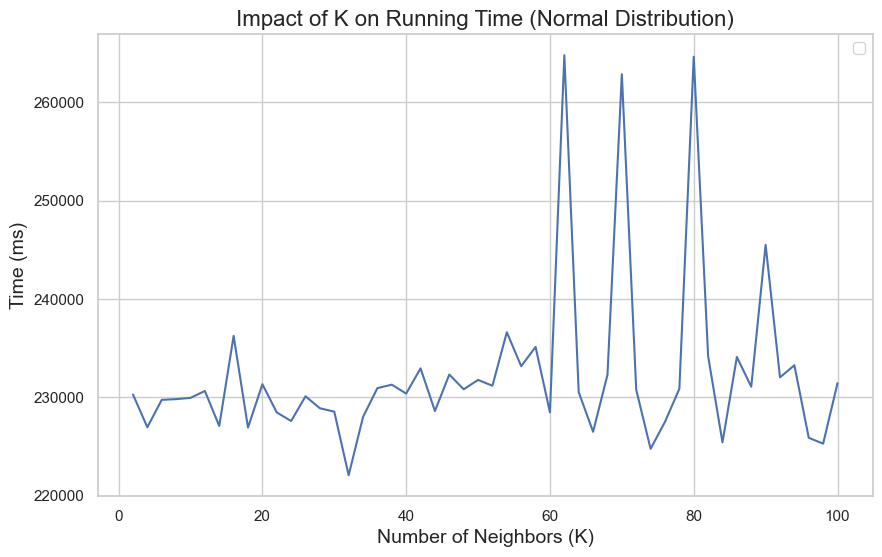

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/1855910478.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


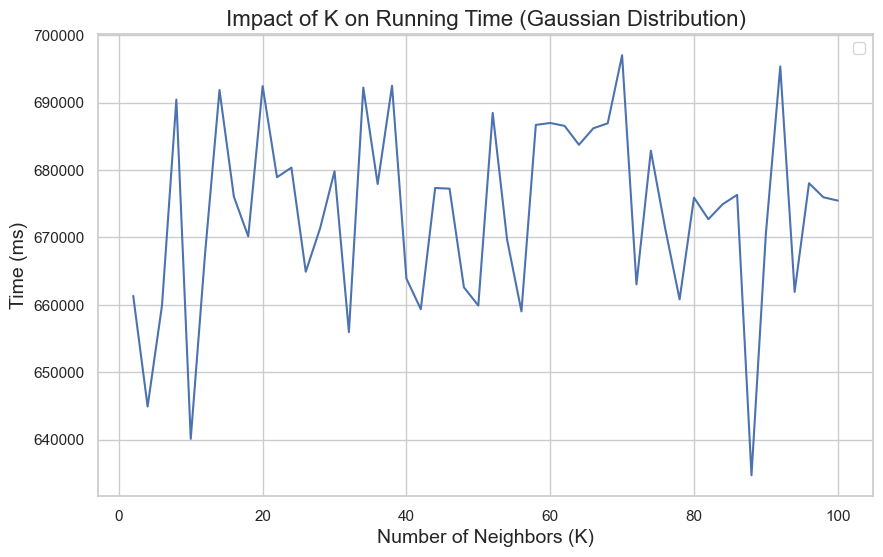

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/1855910478.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


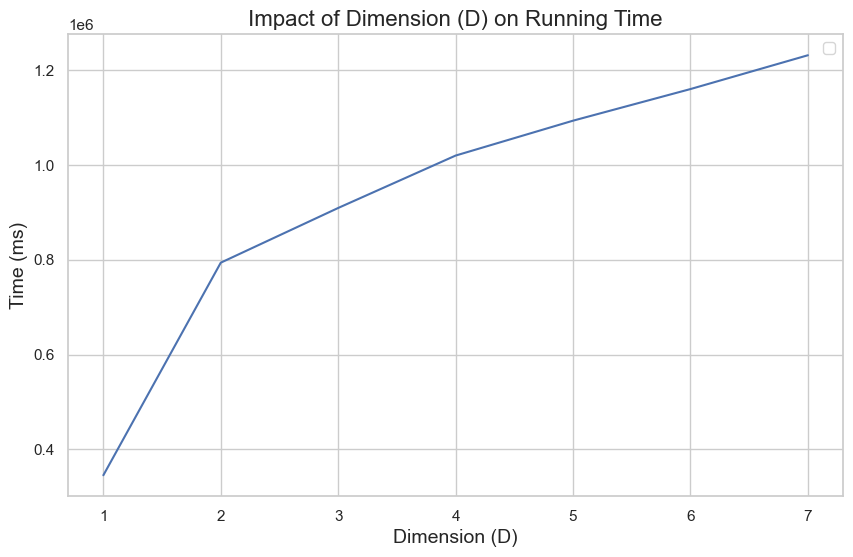

In [35]:
N_bucket_knn_normal = load_data("2DBucketKNNWithDifferentN.csv")
N_bucket_knn_gauss = load_data("2DBucketKNNWithDifferentNGauss.csv")

K_bucket_knn_normal = load_data("2DBucketKNNWithDifferentKNormal.csv")
K_bucket_knn_gauss = load_data("2DBucketKNNWithDifferentKGauss.csv")

D_bucket_knn = load_data("BucketKNNWithDifferentDimension.csv")

sns.set(style="whitegrid")


plot_performance(N_bucket_knn_normal, 'n', 'averageTime', 'Impact of N on Running Time (Normal Distribution)', 'Number of Points (N)', 'Time (ms)')
plot_performance(N_bucket_knn_gauss, 'n', 'averageTime', 'Impact of N on Running Time (Gaussian Distribution)', 'Number of Points (N)', 'Time (ms)')

plot_performance(K_bucket_knn_normal, 'k', 'averageTime', 'Impact of K on Running Time (Normal Distribution)', 'Number of Neighbors (K)', 'Time (ms)')
plot_performance(K_bucket_knn_gauss, 'k', 'averageTime', 'Impact of K on Running Time (Gaussian Distribution)', 'Number of Neighbors (K)', 'Time (ms)')

plot_performance(D_bucket_knn, 'dimension', 'averageTime', 'Impact of Dimension (D) on Running Time', 'Dimension (D)', 'Time (ms)')

## data analysis



                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.553
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.117
Time:                        18:29:47   Log-Likelihood:                -523.68
No. Observations:                  50   AIC:                             1051.
Df Residuals:                      48   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.294e+05   2245.899    102.141      0.0

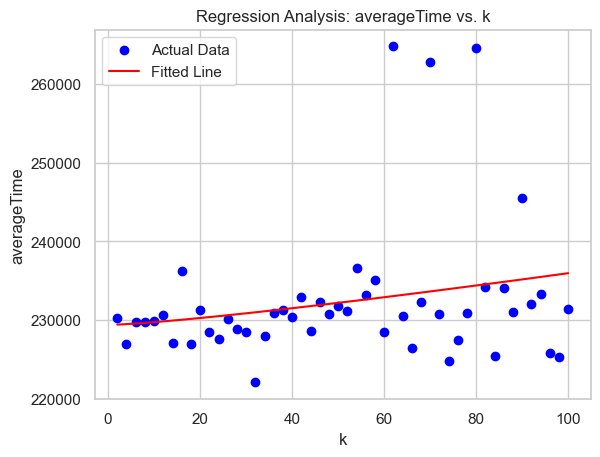

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4236
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.518
Time:                        18:29:47   Log-Likelihood:                -547.71
No. Observations:                  50   AIC:                             1099.
Df Residuals:                      48   BIC:                             1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.718e+05   3631.561    185.001      0.0

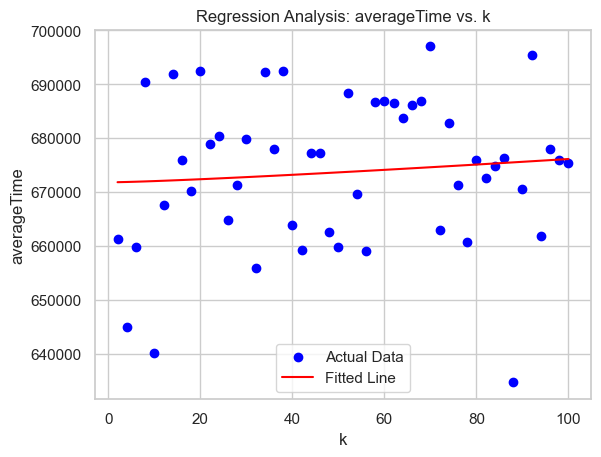

In [36]:
# ---- predictions as k increases -----------
# runtime = K^(increased number of points) * log(K)
# I think as k would increase, the time would go up. This is because the likelihood that the initial rnage query contains points of interest is low. 
# It is also a larger load of numbers for the computer to deal with at each level. 
perform_regression(K_bucket_knn_normal, 'k', 'averageTime', transformation=lambda k: k * np.log(k + 1))
perform_regression(K_bucket_knn_gauss, 'k', 'averageTime', transformation=lambda k: k * np.log(k + 1))


                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     92.42
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.63e-08
Time:                        18:29:50   Log-Likelihood:                -254.51
No. Observations:                  20   AIC:                             513.0
Df Residuals:                      18   BIC:                             515.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.636e+05   2.19e+05     -3.026      0.0

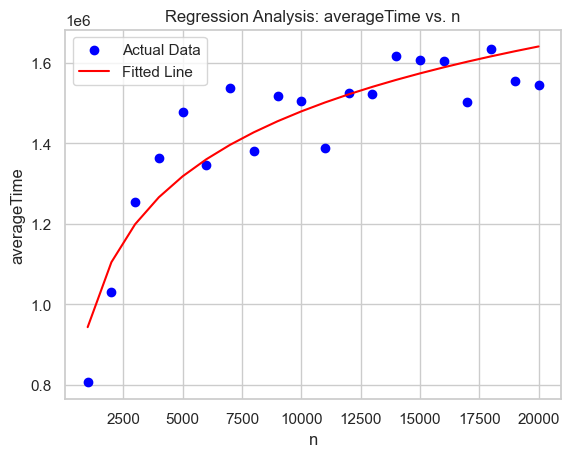

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     43.26
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.53e-06
Time:                        18:29:50   Log-Likelihood:                -253.25
No. Observations:                  20   AIC:                             510.5
Df Residuals:                      18   BIC:                             512.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.349e+05   2.06e+05     -1.626      0.1

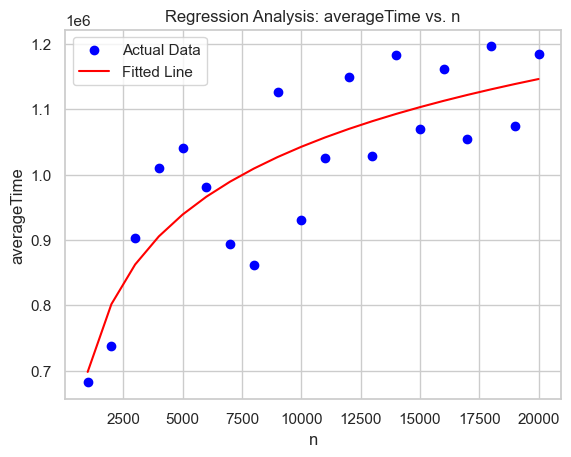

In [37]:
# ------- predictions as n increases ----------
# runtime = log(N)
# this changes the size of the buckets (N would be the size of the bucket and n in the model)
perform_regression(N_bucket_knn_normal, 'n', 'averageTime', transformation=np.log)
perform_regression(N_bucket_knn_gauss, 'n', 'averageTime', transformation=np.log)

/Users/samanthapope/MSD/Github/CS6017/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     11.07
Date:                Sun, 23 Jun 2024   Prob (F-statistic):             0.0208
Time:                        18:29:53   Log-Likelihood:                -93.578
No. Observations:                   7   AIC:                             191.2
Df Residuals:                       5   BIC:                             191.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.549e+05   1.09e+05      5.995      0.0

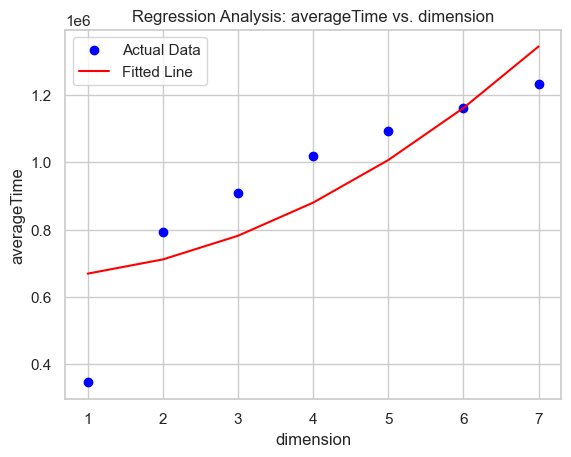

In [38]:
# --------- predictions as D increases ---------
# runtime = N^(b)
# if you increase dimensions then you can hypothetically make the query better at finding the points. 
perform_regression(D_bucket_knn, 'dimension', 'averageTime', transformation=lambda d: d ** 2)

# Quad Tree KNN

    k  averageTime
0   2        50671
1   4        93059
2   6        99525
3   8       126940
4  10       135471
                k   averageTime
count   50.000000      50.00000
mean    51.000000  232647.30000
std     29.154759   66683.97191
min      2.000000   50671.00000
25%     26.500000  185455.75000
50%     51.000000  240938.00000
75%     75.500000  291905.25000
max    100.000000  315336.00000
    k  averageTime
0   2        53462
1   4       100767
2   6       101638
3   8       135154
4  10       136989
                k    averageTime
count   50.000000      50.000000
mean    51.000000  241636.040000
std     29.154759   68033.285832
min      2.000000   53462.000000
25%     26.500000  192736.500000
50%     51.000000  255073.500000
75%     75.500000  301415.000000
max    100.000000  324251.000000
      n  averageTime
0  1000       134846
1  2000       241319
2  3000       350225
3  4000       474586
4  5000       591732
                  n   averageTime
count     20.000000  2.0000

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


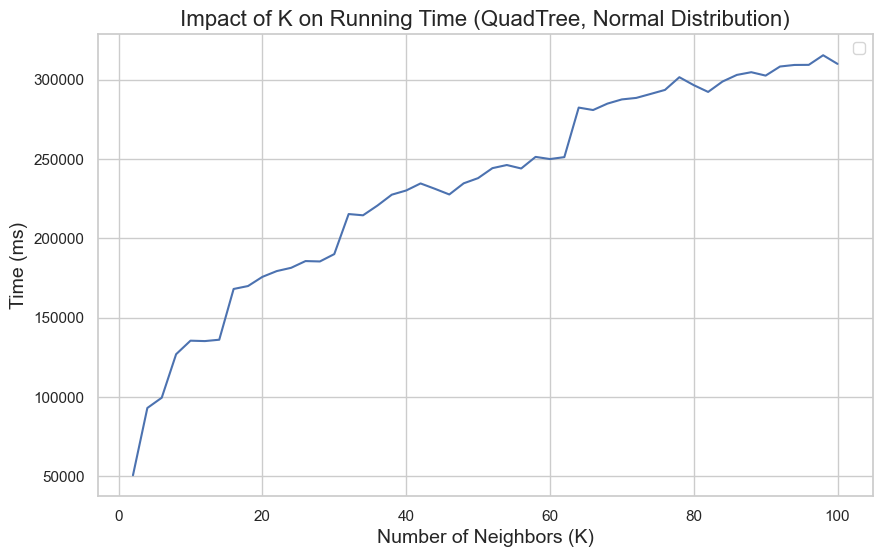

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


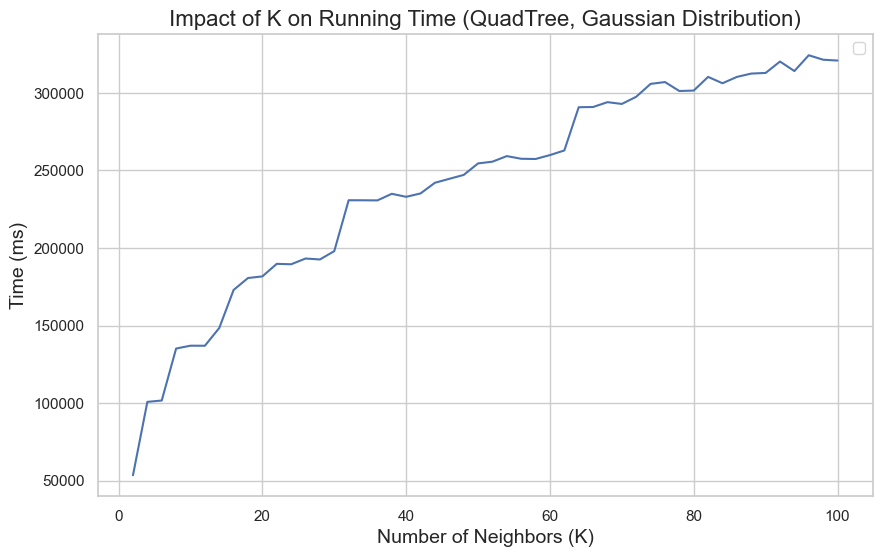

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


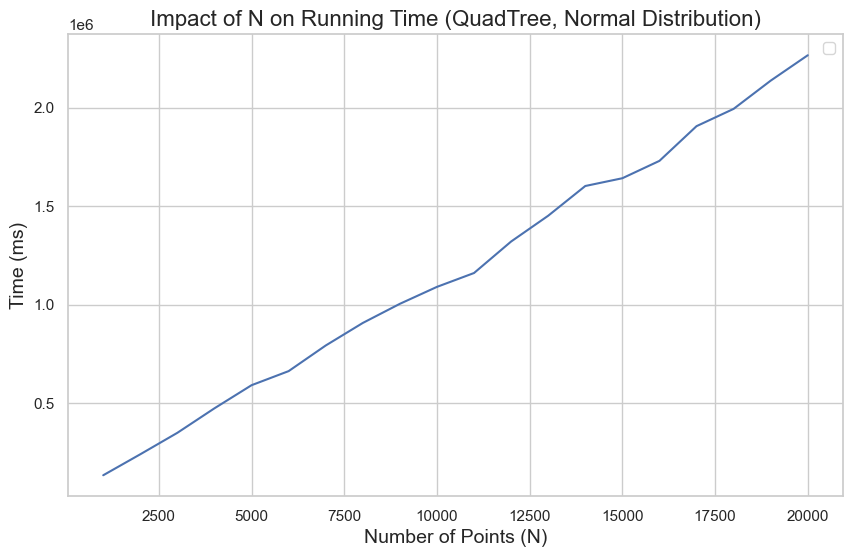

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


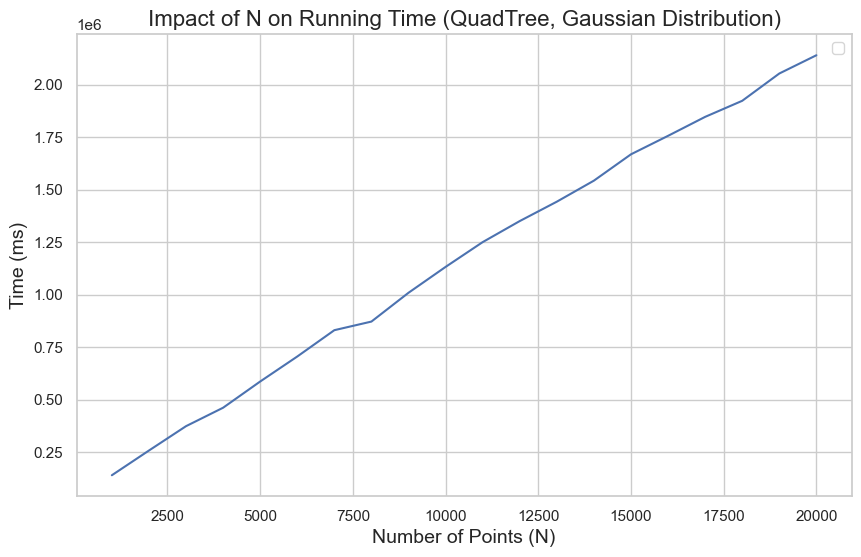

In [17]:
# Load QuadTree data
K_quadTree_normal = load_data("QuadTreeKNNWithDifferentKNormal.csv")
K_quadTree_gauss = load_data("QuadTreeKNNWithDifferentKGaussian.csv")

N_quadTree_normal = load_data("QuadTreeKNNWithDifferentN.csv")
N_quadTree_gauss = load_data("QuadTreeKNNWithDifferentNGauss.csv")


perform_regression(K_quadTree_normal, 'k', 'averageTime')
perform_regression(K_quadTree_gauss, 'k', 'averageTime')

perform_regression(N_quadTree_normal, 'n', 'averageTime')
perform_regression(N_quadTree_gauss, 'n', 'averageTime')


sns.set(style="whitegrid")
plot_performance(K_quadTree_normal, 'k', 'averageTime', 'Impact of K on Running Time (QuadTree, Normal Distribution)', 'Number of Neighbors (K)', 'Time (ms)')
plot_performance(K_quadTree_gauss, 'k', 'averageTime', 'Impact of K on Running Time (QuadTree, Gaussian Distribution)', 'Number of Neighbors (K)', 'Time (ms)')

plot_performance(N_quadTree_normal, 'n', 'averageTime', 'Impact of N on Running Time (QuadTree, Normal Distribution)', 'Number of Points (N)', 'Time (ms)')
plot_performance(N_quadTree_gauss, 'n', 'averageTime', 'Impact of N on Running Time (QuadTree, Gaussian Distribution)', 'Number of Points (N)', 'Time (ms)')


                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           4.56e-36
Time:                        18:39:37   Log-Likelihood:                -544.30
No. Observations:                  50   AIC:                             1093.
Df Residuals:                      48   BIC:                             1096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.34e+04   7985.103     -4.183      0.0

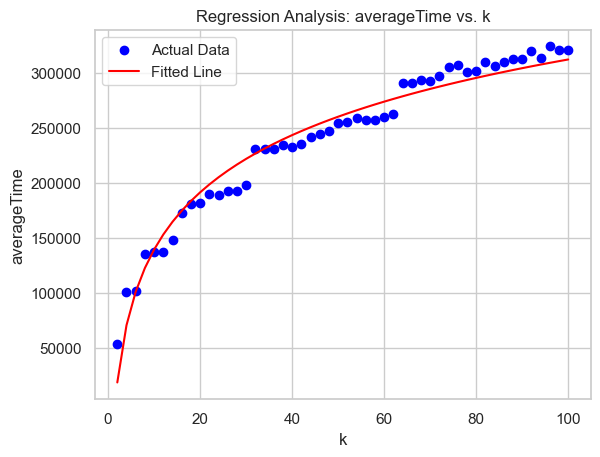

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1104.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           8.68e-35
Time:                        18:39:37   Log-Likelihood:                -546.37
No. Observations:                  50   AIC:                             1097.
Df Residuals:                      48   BIC:                             1101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.626e+04   8321.837     -4.357      0.0

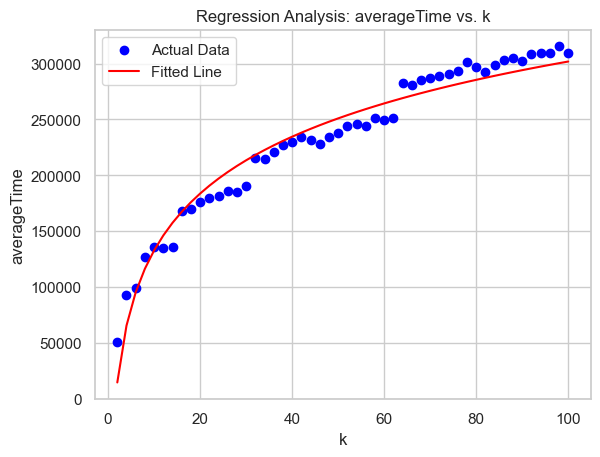

In [40]:
# -------- predicting runtime as k increases -----
# i think that as k increases, there will be a logarithmic increase in time
# increasing k increases the number of neighbors. this has a cost of retrieving data but scaling it makes up for this initial cost of computer a lot of initial closest neighbors
perform_regression(K_quadTree_gauss ,'k', 'averageTime', transformation=np.log)
perform_regression(K_quadTree_normal,'k','averageTime',transformation=np.log) 


                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.565e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           6.47e-28
Time:                        18:42:35   Log-Likelihood:                -227.08
No. Observations:                  20   AIC:                             458.2
Df Residuals:                      18   BIC:                             460.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.846e+04   1.01e+04      5.782      0.0

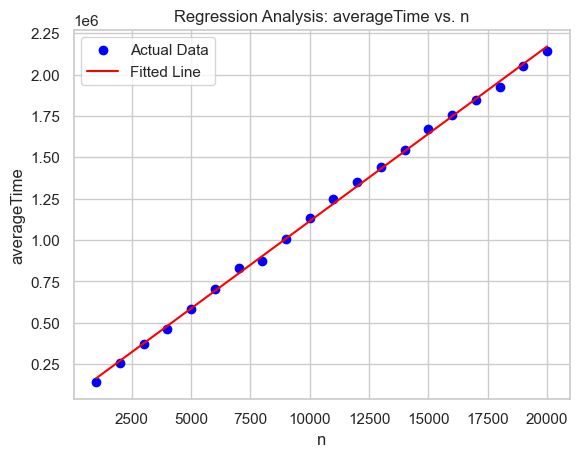

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9599.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           5.23e-26
Time:                        18:42:35   Log-Likelihood:                -232.85
No. Observations:                  20   AIC:                             469.7
Df Residuals:                      18   BIC:                             471.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.488e+04   1.35e+04      1.103      0.2

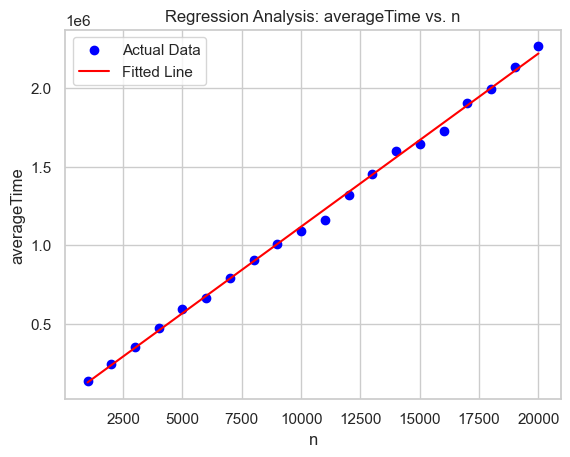

In [42]:
# ------------ predicting runtime as n increases ----------------
# i think that as n increases, the runtime will increase proportionally to make a linear relationsihp
# this is because there will be more time to process n at every step

perform_regression(N_quadTree_gauss ,'n', 'averageTime', transformation=lambda x:x)
perform_regression(N_quadTree_normal,'n','averageTime',transformation=lambda x:x) 


# KD Tree KNN

    k  averageTime
0   2         8252
1   4        16376
2   6        17975
3   8        24813
4  10        26118
                k    averageTime
count   50.000000      50.000000
mean    51.000000   66255.700000
std     29.154759   28099.916658
min      2.000000    8252.000000
25%     26.500000   43764.500000
50%     51.000000   65769.500000
75%     75.500000   91008.000000
max    100.000000  108944.000000
    k  averageTime
0   2         8274
1   4        17062
2   6        18711
3   8        25810
4  10        27256
                k   averageTime
count   50.000000      50.00000
mean    51.000000   71436.52000
std     29.154759   30611.74401
min      2.000000    8274.00000
25%     26.500000   46185.50000
50%     51.000000   71448.50000
75%     75.500000   98755.75000
max    100.000000  117709.00000
      n  averageTime
0  1000        25939
1  2000        31096
2  3000        34209
3  4000        37298
4  5000        39144
                  n   averageTime
count     20.000000     20.

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


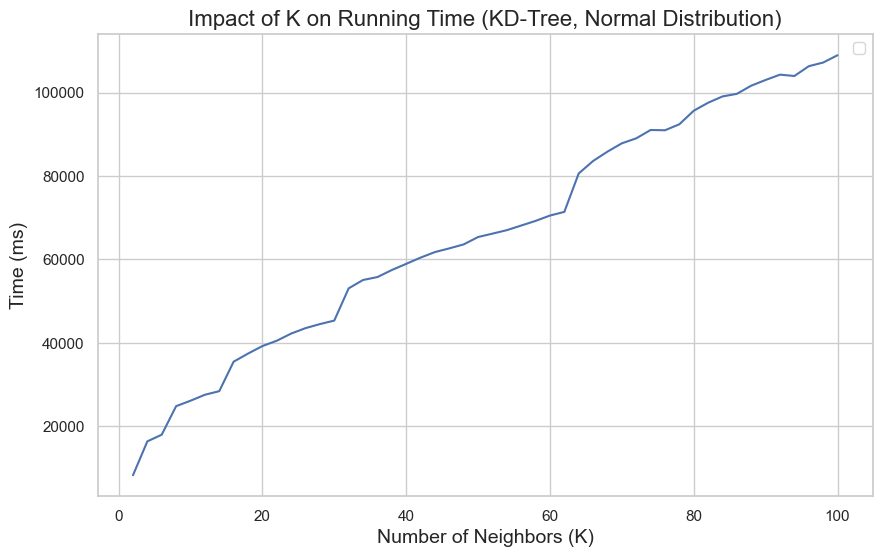

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


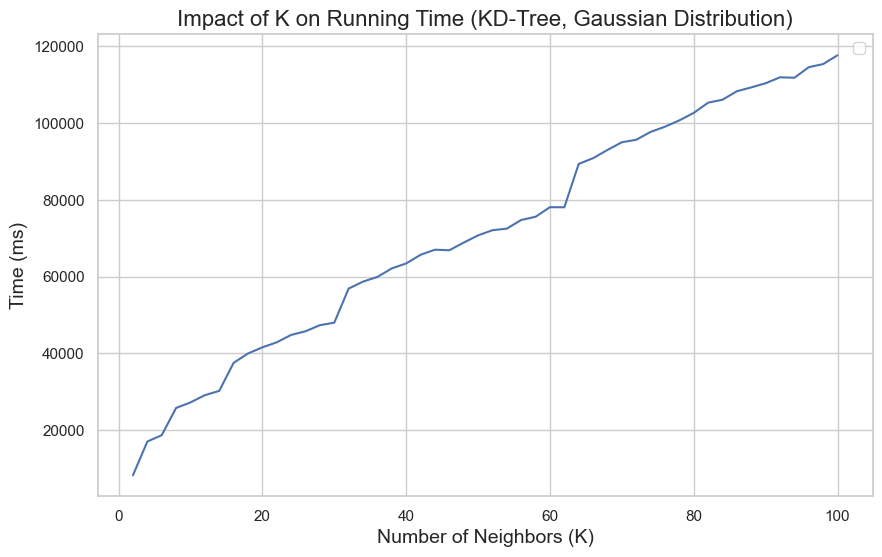

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


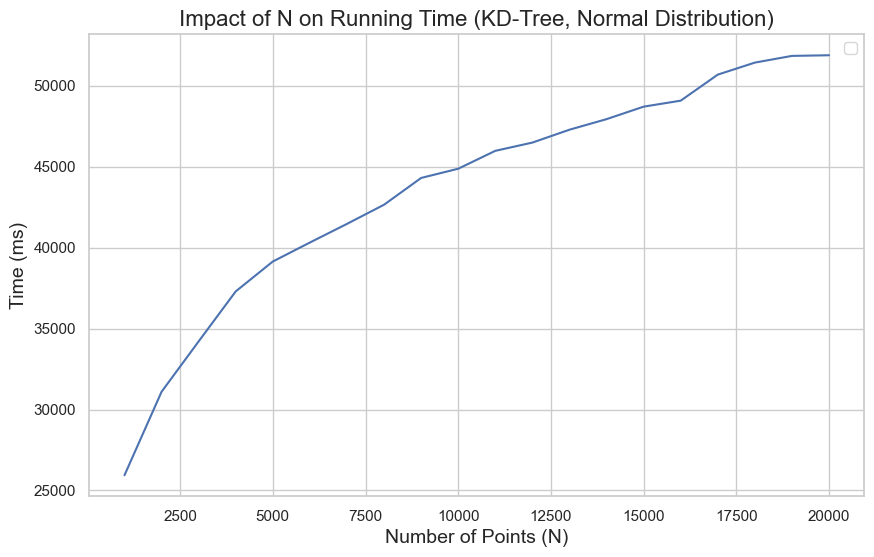

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


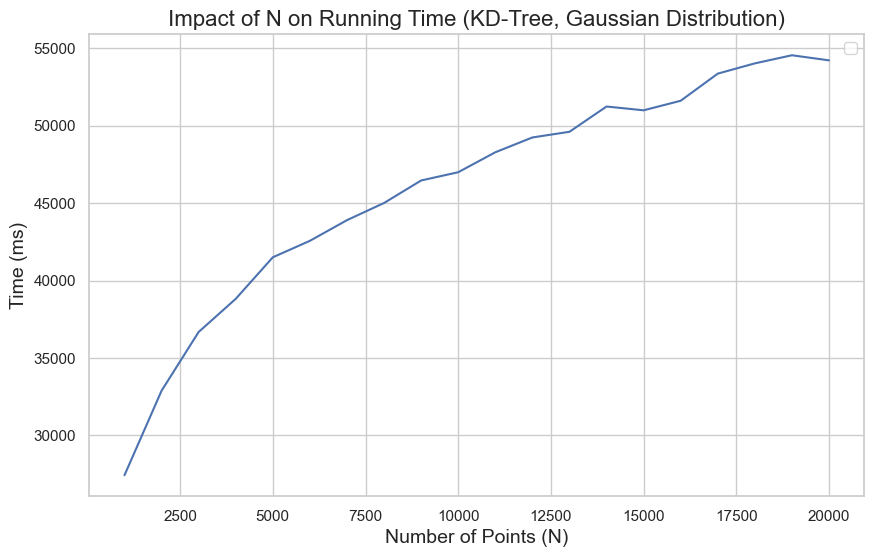

/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/2296499112.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


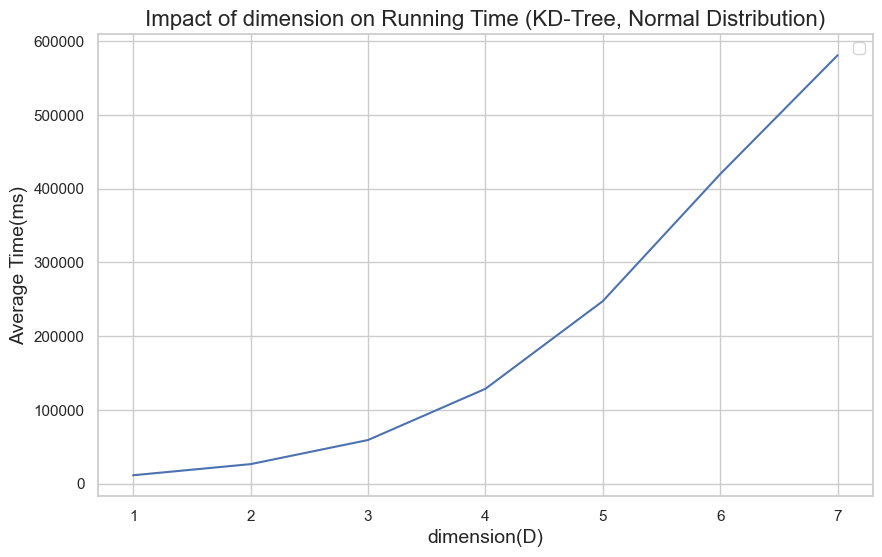

In [24]:
# Load KD-Tree data
K_kdTree_normal = load_data("KdTreeKNNWithDifferentKNormal.csv")
K_kdTree_gauss = load_data("KdTreeKNNWithDifferentKGauss.csv")

N_kdTree_normal = load_data("KdTreeKNNWithDifferentN.csv")
N_kdTree_gauss = load_data("KdTreeKNNWithDifferentNGauss.csv")
sns.set(style="whitegrid")


D_kdTree_normal = load_data("KDTreeWithDifferentDimension.csv")


# Plotting K impact on performance for KD-Tree
plot_performance(K_kdTree_normal, 'k', 'averageTime', 'Impact of K on Running Time (KD-Tree, Normal Distribution)', 'Number of Neighbors (K)', 'Time (ms)')
plot_performance(K_kdTree_gauss, 'k', 'averageTime', 'Impact of K on Running Time (KD-Tree, Gaussian Distribution)', 'Number of Neighbors (K)', 'Time (ms)')

# Plotting N impact on performance for KD-Tree
plot_performance(N_kdTree_normal, 'n', 'averageTime', 'Impact of N on Running Time (KD-Tree, Normal Distribution)', 'Number of Points (N)', 'Time (ms)')
plot_performance(N_kdTree_gauss, 'n', 'averageTime', 'Impact of N on Running Time (KD-Tree, Gaussian Distribution)', 'Number of Points (N)', 'Time (ms)')


plot_performance(D_kdTree_normal, 'dimension','averageTime','Impact of dimension on Running Time (KD-Tree, Normal Distribution)' ,'dimension(D)','Average Time(ms)')

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3304.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           7.49e-22
Time:                        19:02:38   Log-Likelihood:                -154.12
No. Observations:                  20   AIC:                             312.2
Df Residuals:                      18   BIC:                             314.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -3.7e+04   1448.975    -25.533      0.0

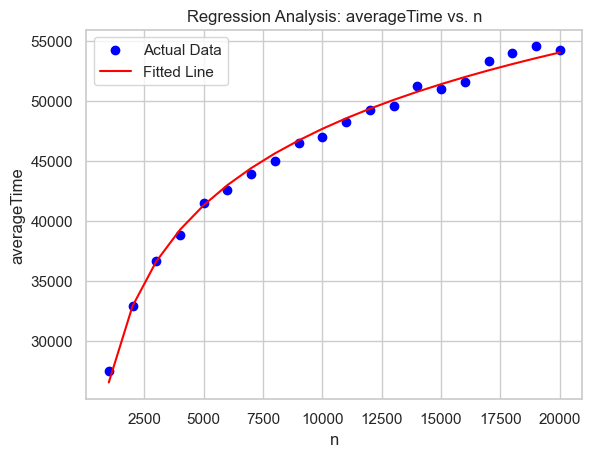

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3241.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           8.89e-22
Time:                        19:02:39   Log-Likelihood:                -153.52
No. Observations:                  20   AIC:                             311.0
Df Residuals:                      18   BIC:                             313.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.611e+04   1406.122    -25.683      0.0

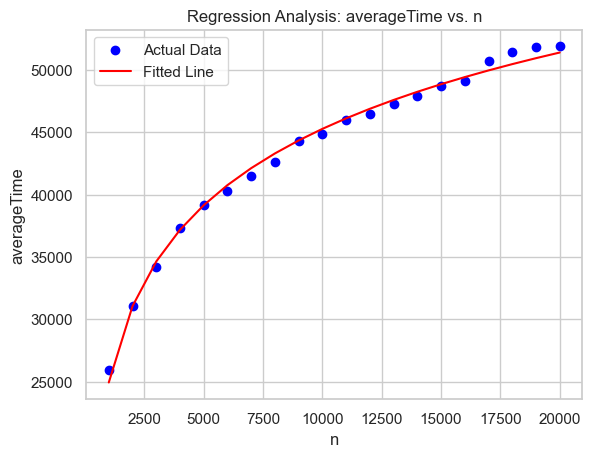

In [43]:
# -------- predicting runtime as n increases -----
# i think that as n increases, there will be a logarithmic increase in time
perform_regression(N_kdTree_gauss ,'n', 'averageTime', transformation=np.log)
perform_regression(N_kdTree_normal,'n','averageTime',transformation=np.log) 


                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.03e-23
Time:                        19:03:32   Log-Likelihood:                -533.95
No. Observations:                  50   AIC:                             1072.
Df Residuals:                      48   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.683e+04   6492.335     -7.214      0.0

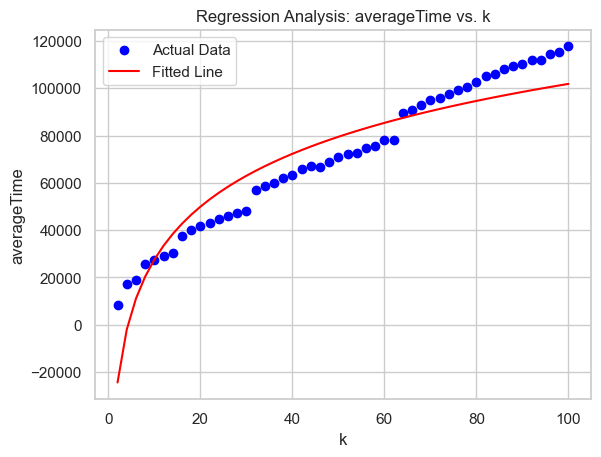

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     337.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.35e-23
Time:                        19:03:32   Log-Likelihood:                -530.53
No. Observations:                  50   AIC:                             1065.
Df Residuals:                      48   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.205e+04   6062.933     -6.936      0.0

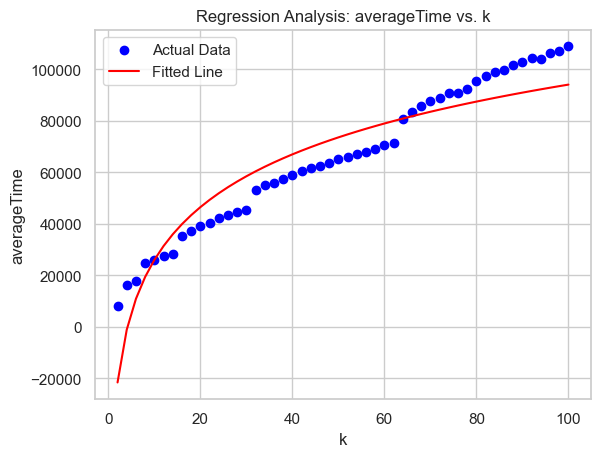

In [45]:
# -------- predicting runtime as k increases -----
# i think that as k increases, there will be a logarithmic increase in time
# increasing k increases the number of neighbors. this has a cost of retrieving data but scaling it makes up for this initial cost of computer a lot of initial closest neighbors
perform_regression(K_kdTree_gauss ,'k', 'averageTime', transformation=np.log)
perform_regression(K_kdTree_normal,'k','averageTime',transformation=np.log) 


                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     11.43
Date:                Sun, 23 Jun 2024   Prob (F-statistic):             0.0197
Time:                        19:04:43   Log-Likelihood:                -91.283
No. Observations:                   7   AIC:                             186.6
Df Residuals:                       5   BIC:                             186.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.131e+05   1.08e+05     -1.048      0.3

/Users/samanthapope/MSD/Github/CS6017/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


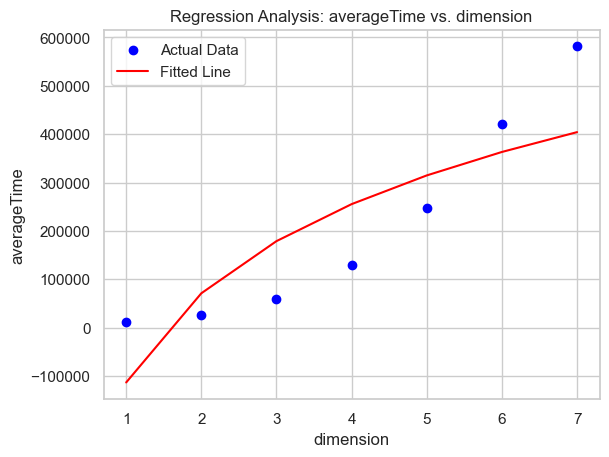

In [48]:
# -------- predicting runtime as dimension increases -----
# i think that as dimension increases, there will be a logarithmic increase in time
perform_regression(D_kdTree_normal ,'dimension', 'averageTime', transformation=np.log)


# optional! leaf node

   maxPointsPerLeaf  averageTime
0                 1       167788
1                 2       144674
2                 3       138085
3                 4       132444
4                 5       129781
       maxPointsPerLeaf   averageTime
count          50.00000      50.00000
mean           25.50000  134720.34000
std            14.57738    5831.59068
min             1.00000  126817.00000
25%            13.25000  131958.75000
50%            25.50000  134547.00000
75%            37.75000  136352.75000
max            50.00000  167788.00000


/var/folders/jx/m9spg8152bb3szcm42r7qwb40000gn/T/ipykernel_65563/1855910478.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue)


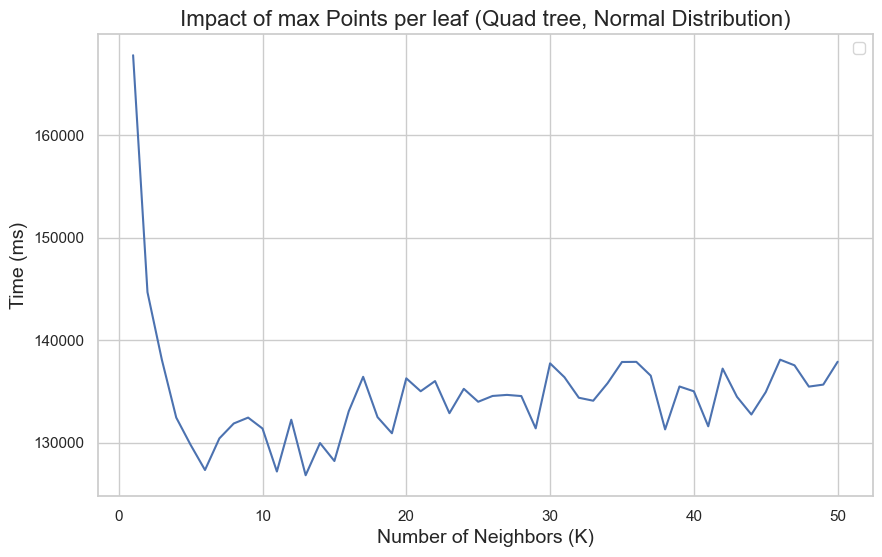

In [50]:
QuadTree_Leafs = load_data("QuadTreeWithDifferentMaxPointsPerLeaf.csv")
sns.set(style="whitegrid")


# Plotting K impact on performance for KD-Tree
plot_performance(QuadTree_Leafs, 'maxPointsPerLeaf', 'averageTime', 'Impact of max Points per leaf (Quad tree, Normal Distribution)', 'Number of Neighbors (K)', 'Time (ms)')
